<h1>Eigen-Emoji</h1>
<h3>Mark Rainey</h3>
<p>This is a demonstration of the Singular Value Decomposition performed on Emoji.</p>
<p>All emojis designed by <a href="https://openmoji.org/">OpenMoji</a> – the open-source emoji and icon project. License: <a href="https://creativecommons.org/licenses/by-sa/4.0/#">CC BY-SA 4.0</a></p>


<p>First, we will load our emoji and process them. This involves converting each to black and white, flattening into a column vector and sending it to the approriate Matrix column.</p>

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
import os

folder_path = r"C:\Users\mark.rainey\eigen_emoji\emoji"

#Set emoji dimensions
m = 72
n = 72
n_emoji = 154
n_test = 20
#Build matrix for storing Emoji in columns
emojis = np.zeros((m*n, n_emoji-n_test))
test_emojis = np.zeros(((m*n), n_test))
# Make sure to check if the images exist and are read correctly
for i in range(n_emoji - 1):
    file_path = os.path.join(folder_path, f"{i}")
    if os.path.exists(file_path):
        # Read the image data
        img_data = image.imread(file_path)
        # Check if the image is not empty or all zeros
        if np.any(img_data):
            # Convert to grayscale by taking the average across the color channels
            grayscale_image = np.mean(img_data[..., :3], axis=2)
            
            #Separate emoji into training and testing
            if i <= n_emoji - n_test - 1:
                emojis[:,i]= grayscale_image.reshape(-1)
            else:
                test_emojis[:,134-i]= grayscale_image.reshape(-1)
        else:
            print(f"Image at {file_path} is empty or all zeros.")
    else:
        print(f"File does not exist: {file_path}")

#Take average of all emojis
avgFace = np.mean(emojis, axis=1)

#Subtract the average emoji from all emoji, take SVD
X = emojis - np.tile(avgFace, (emojis.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)


<p>Now, we will display the average Emoji as well as our first Singular Value.</p>

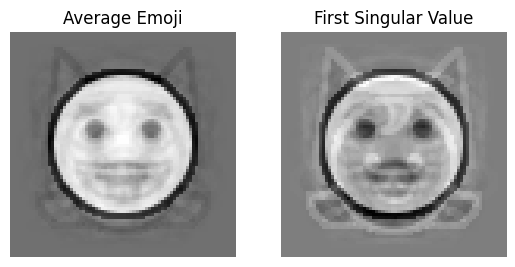

In [29]:
#Plot Average Emoji against First Singular Values
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.set_title('Average Emoji')
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)))
img_avg.set_cmap('gray')
plt.axis('off')
ax2 = fig1.add_subplot(122)
ax2.set_title('First Singular Value')
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)))
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

<p> Let's reconstruct an emoji from our test dataset using only the data from training. </p>

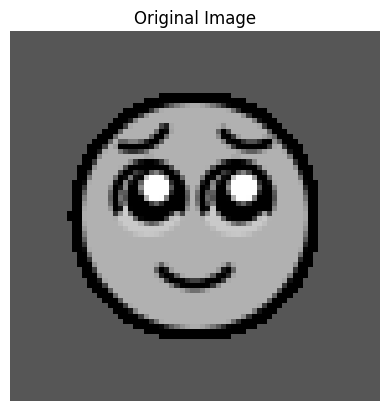

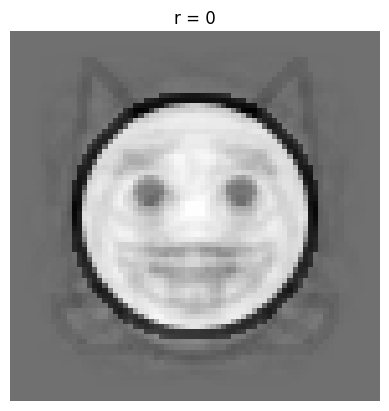

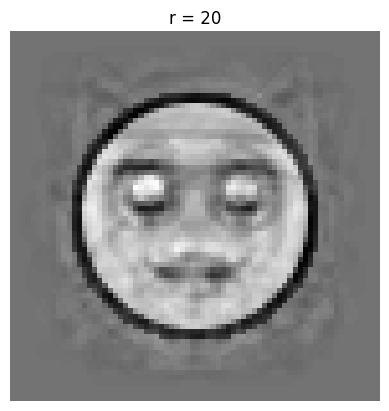

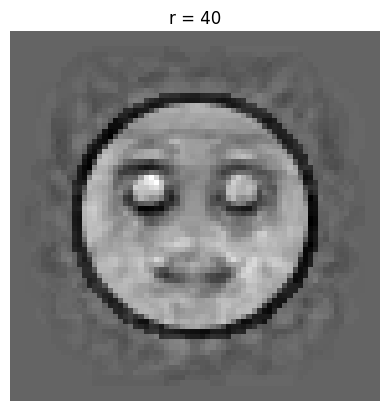

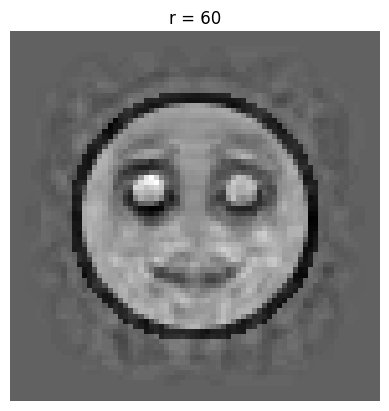

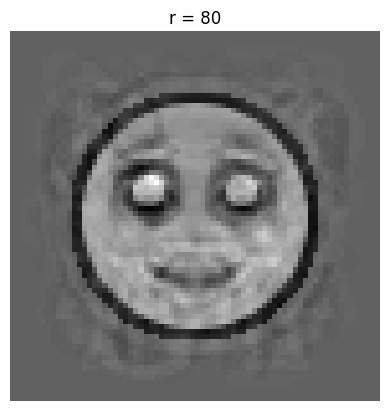

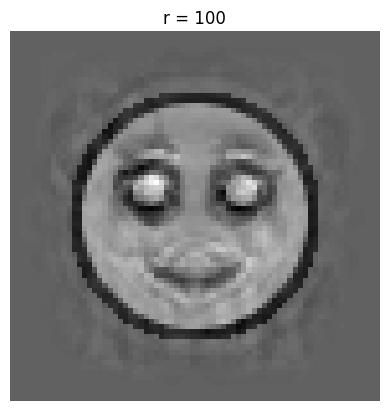

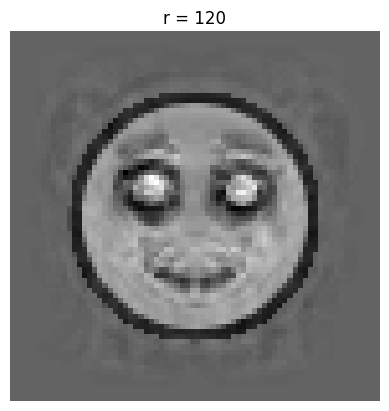

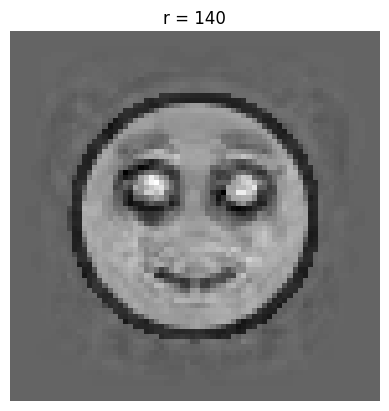

In [36]:
#Load testface and reconstruct it for reference.
testFace = test_emojis[:,19]
#testFace = emojis[:,1]
plt.imshow(np.reshape(testFace,(m,n)))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

#Mean subtract test face
testFaceMS = testFace - avgFace

#Generate reconstructions, based on increasing Singular Values
r_list = np.arange(0,144,20)

for r in r_list:
    reconFace = avgFace + U[:,:r]  @ U[:,:r].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace,(m,n)))
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

<p> Playing with classification. Need to find better examples. </p>

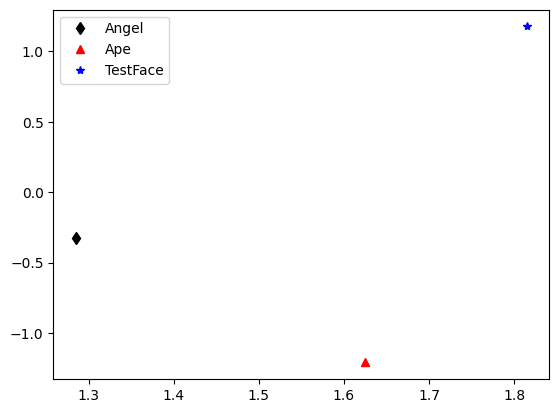

In [22]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 20 # Person number 2
P2num = 10 # Person number 7
T1num = 1

P1 = emojis[:,P1num-1:P1num]
P2 = emojis[:,P2num-1:P2num]
testFace = test_emojis[:,T1num-1:T1num]


P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

testFace = testFace - np.tile(avgFace,(testFace.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2
PCACoordstF = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ testFace

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='k',label='Angel')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='r',label='Ape')
plt.plot(PCACoordstF[0,:],PCACoordstF[1,:],'*',color='b',label='TestFace')


plt.legend()
plt.show()

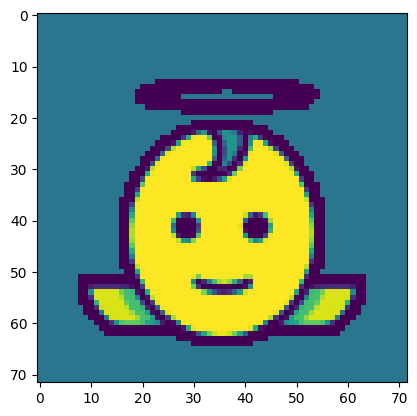

In [14]:
plt.imshow(np.reshape(emojis[:,20],(m,n)))

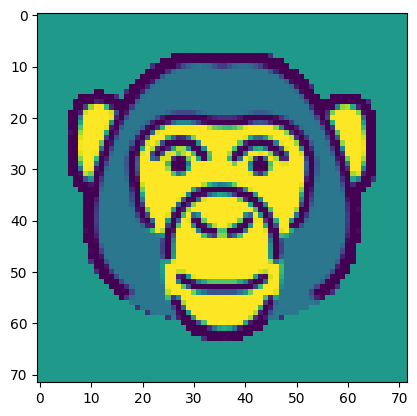

In [17]:
plt.imshow(np.reshape(emojis[:,10],(m,n)))

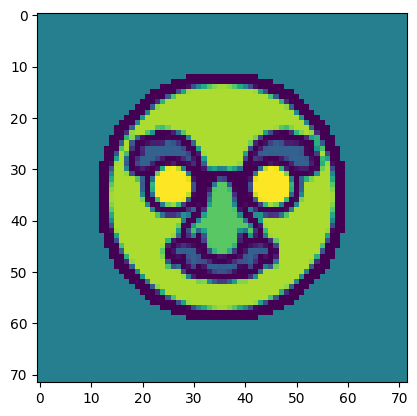

In [16]:
plt.imshow(np.reshape(test_emojis[:,0],(m,n)))